In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-shows/netflix_titles.csv


# READING THE FILE

In [23]:
df = pd.read_csv('/kaggle/input/netflix-shows/netflix_titles.csv')

df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


# LOOKING FOR NULLS

In [24]:
for i in df.columns:
    null_rate = df[i].isnull().sum()/len(df)*100
    print(f"{i} - {round(null_rate,2)}%")

show_id - 0.0%
type - 0.0%
title - 0.0%
director - 29.91%
cast - 9.37%
country - 9.44%
date_added - 0.11%
release_year - 0.0%
rating - 0.05%
duration - 0.03%
listed_in - 0.0%
description - 0.0%


# DEALING WITH MISSING DATA

In [25]:
df[['country','director','cast']] = df[['country','director','cast']].replace(np.nan,'No Data')


In [26]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [27]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8790 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   cast          8790 non-null   object
 5   country       8790 non-null   object
 6   date_added    8790 non-null   object
 7   release_year  8790 non-null   int64 
 8   rating        8790 non-null   object
 9   duration      8790 non-null   object
 10  listed_in     8790 non-null   object
 11  description   8790 non-null   object
dtypes: int64(1), object(11)
memory usage: 892.7+ KB


# MOVIE AND TV SHOW DISTRIBUTION

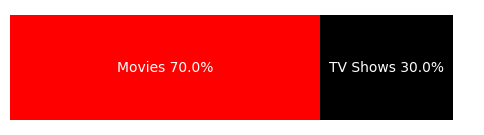

In [49]:
import matplotlib.pyplot as plt

# Example data
movie_pct =  round((df['type']=='Movie').sum()/len(df)*100,0)  # percentage of movies
tv_pct = round((df['type']=='TV Show').sum()/len(df)*100,0)     # percentage of TV shows

# Create a horizontal stacked bar
fig, ax = plt.subplots(figsize=(6, 1.5))

ax.barh(0, movie_pct, color='red')
ax.barh(0, tv_pct, left=movie_pct, color='black')

# Remove axes
ax.axis('off')

# Add labels inside the bar
ax.text(movie_pct/2, 0, f"Movies {movie_pct}%", va='center', ha='center', color='white', fontsize=10)
ax.text(movie_pct + tv_pct/2, 0, f"TV Shows {tv_pct}%", va='center', ha='center', color='white', fontsize=10)

plt.show()


# DITRIBUTION BY COUNTRY

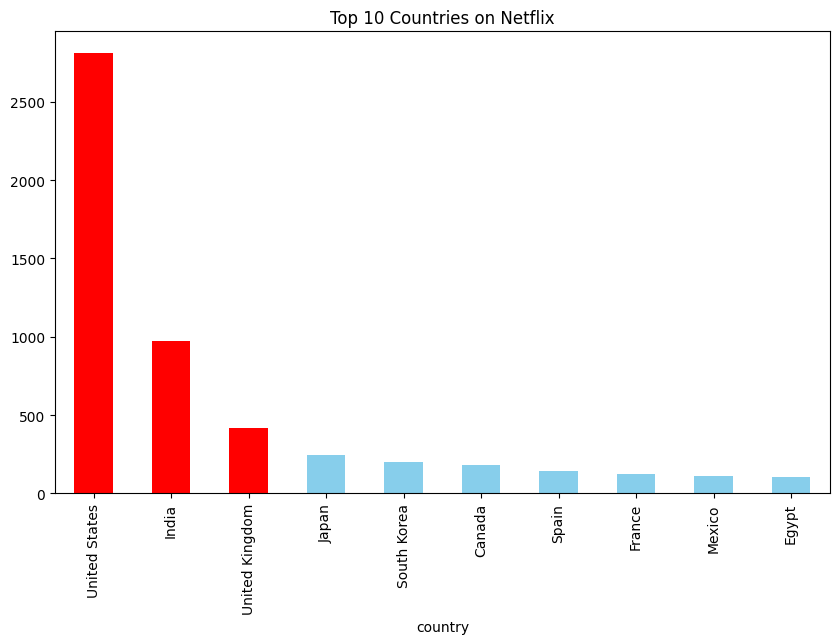

In [62]:
df_filtered = df[df['country']!='No Data']
r = df_filtered.groupby('country')['type'].count().sort_values(ascending=False).head(10)

# Plot vertical bar chart
plt.figure(figsize=(10,6))
colors = ['red' if i < 3 else 'skyblue' for i in range(len(r))]
r.plot(kind='bar',color=colors)

plt.title("Top 10 Countries on Netflix")
plt.show()